In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

import warnings;
warnings.filterwarnings('ignore');

In [2]:
dataset = pd.read_csv('jupyter/cardio_train.csv', sep=';')

In [3]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dataset.shape

(70000, 13)

In [5]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [7]:
data = dataset.drop('id', axis=1)

In [8]:
data = data[(data['height']>140) & (data['height']<210)]
data = data[(data['weight']>30)]
data = data[(data['ap_hi']>30) & (data['ap_hi']<300)]
data = data[(data['ap_lo']>20) & (data['ap_lo']<280)]

In [9]:
data.age = data.age/365

In [10]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000,68577.000000
mean,53.327415,1.348965,164.481532,74.130378,126.615425,81.380609,1.364962,1.226140,0.088120,0.053691,0.803447,0.494904
std,6.760083,0.476646,7.778573,14.273628,16.759444,9.686323,0.679230,0.572154,0.283471,0.225409,0.397394,0.499978
min,29.583562,1.000000,141.000000,31.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.419178,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,207.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.shape

(68577, 12)

In [13]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Place for plots

Text(0.5, 1.0, 'Presence of cardiovascular disease')

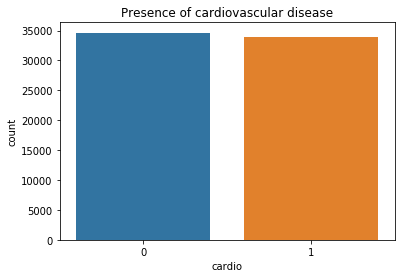

In [14]:
sns.countplot(x="cardio", data=data)
plt.title("Presence of cardiovascular disease")

Text(0.5, 1.0, 'Age in years')

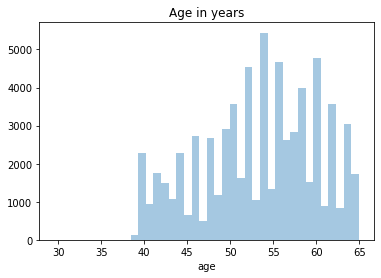

In [15]:
sns.distplot(data.age, kde=False, bins=40)
plt.title("Age in years")

(140, 200)

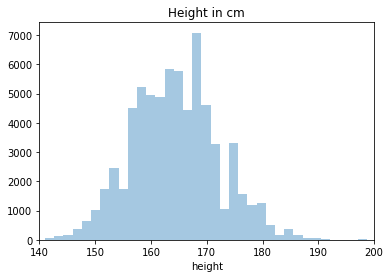

In [16]:
sns.distplot(data.height, kde=False, bins=40)
plt.title("Height in cm")
plt.xlim(140,200)

(30, 150)

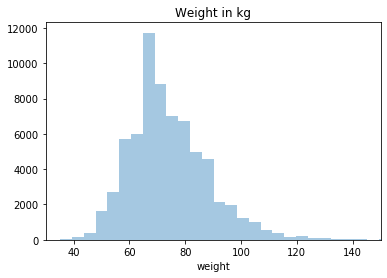

In [17]:
sns.distplot(data.weight, kde=False, bins=40)
plt.title("Weight in kg")
plt.xlim(30, 150)

Text(0.5, 1.0, 'BMI')

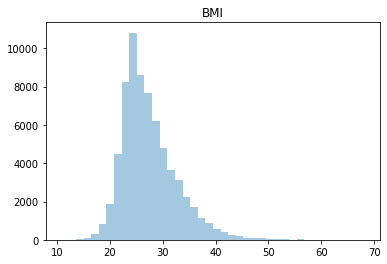

In [18]:
bmi = (data.weight/(data.height*data.height))*10000
sns.distplot(bmi, kde=False, bins=40)
plt.title("BMI")

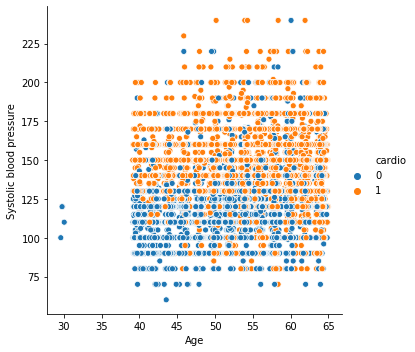

In [19]:
ax = sns.relplot(x='age', y='ap_hi', data=data, hue='cardio')
ax.set(xlabel='Age', ylabel='Systolic blood pressure')

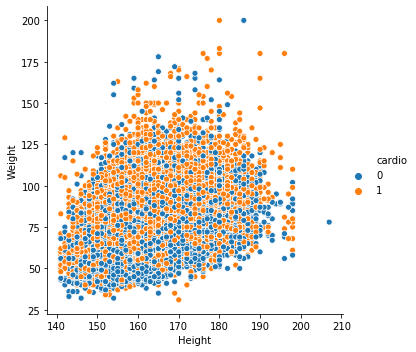

In [20]:
ax = sns.relplot(x='height', y='weight', data=data, hue='cardio')
ax.set(xlabel='Height', ylabel='Weight')

Text(0.5, 0, '')

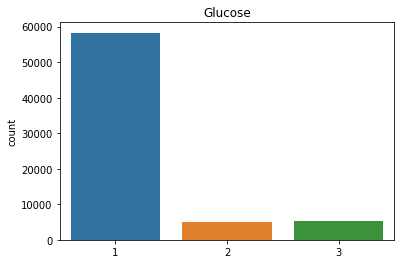

In [21]:
sns.countplot(x="gluc", data=data)
plt.title("Glucose")
plt.xlabel("")

Text(0.5, 0, '')

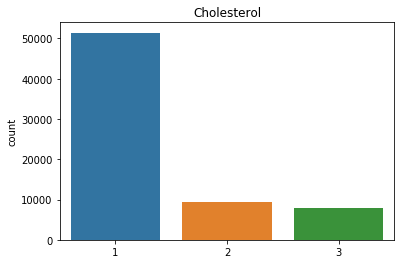

In [22]:
sns.countplot(x="cholesterol", data=data)
plt.title("Cholesterol")
plt.xlabel("")

Text(0.5, 0, '')

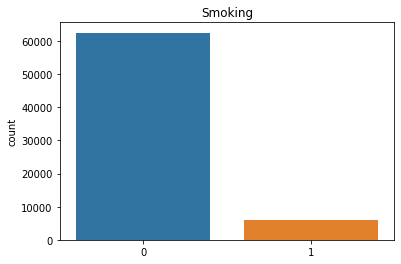

In [23]:
sns.countplot(x="smoke", data=data)
plt.title("Smoking")
plt.xlabel("")

In [24]:
gender_dummy = pd.get_dummies(data.gender, prefix='gender', drop_first=True)
cholesterol_dummy = pd.get_dummies(data.cholesterol, prefix = 'cholesterol', drop_first = True)
glucose_dummy = pd.get_dummies(data.gluc, prefix='glucose', drop_first = True)

data = pd.concat([data, gender_dummy, cholesterol_dummy, glucose_dummy], axis=1)

data.drop('gender', axis=1, inplace=True)
data.drop('cholesterol', axis=1, inplace=True)
data.drop('gluc', axis=1, inplace=True)

data.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,glucose_2,glucose_3
0,50.391781,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,55.419178,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,51.663014,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,48.282192,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,47.873973,156,56.0,100,60,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('cardio', axis=1).iloc[:,:].values
y = data.cardio.values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Models

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [10,100,1000,3000],
             'max_depth': [2,4,7,10]}

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=4), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)

print("Best cross-validation score: {:.3f}%".format(grid_search.best_score_*100))
print("Score on test set: {:.3f}%".format(grid_search.score(X_test, y_test)*100))
print("Best parameters: {}".format(grid_search.best_params_))

Best cross-validation score: 73.462%
Score on test set: 73.141%
Best parameters: {'max_depth': 10, 'n_estimators': 1000}


Text(33.0, 0.5, 'max_depth')

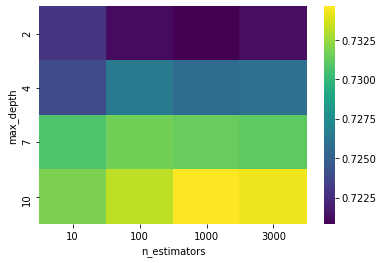

In [28]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(4,4)
sns.heatmap(scores, xticklabels=param_grid['n_estimators'],
            yticklabels=param_grid['max_depth'], cmap='viridis')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

In [29]:
confusion_matrix(y_test, grid_search.predict(X_test))

array([[2786,  699],
       [1143, 2230]], dtype=int64)

Text(0.5, 0, 'Predicted label')

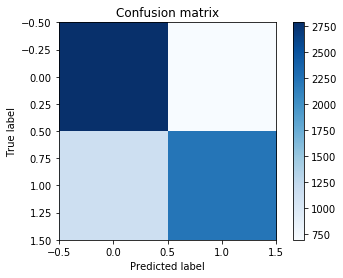

In [30]:
plt.imshow(confusion_matrix(y_test, grid_search.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

K-Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [5,10,15,20,30]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)

print("Best cross-validation score: {:.3f}%".format(grid_search.best_score_*100))
print("Score on test set: {:.3f}%".format(grid_search.score(X_test, y_test)*100))
print("Best parameter: {}".format(grid_search.best_params_))

Best cross-validation score: 71.642%
Score on test set: 71.712%
Best parameter: {'n_neighbors': 30}


In [32]:
confusion_matrix(y_test, grid_search.predict(X_test))

array([[2728,  757],
       [1183, 2190]], dtype=int64)

Text(0.5, 0, 'Predicted label')

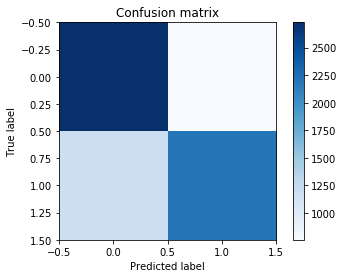

In [33]:
plt.imshow(confusion_matrix(y_test, grid_search.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)

print("Best cross-validation score: {:.3f}%".format(grid_search.best_score_*100))
print("Test score: {:.3f}%".format(grid_search.score(X_test, y_test)*100))
print("Best parameter: {}".format(grid_search.best_params_))

Best cross-validation score: 71.871%
Test score: 71.829%
Best parameter: {'C': 100}


In [35]:
confusion_matrix(y_test, grid_search.predict(X_test))

array([[2677,  808],
       [1124, 2249]], dtype=int64)

Text(0.5, 0, 'Predicted label')

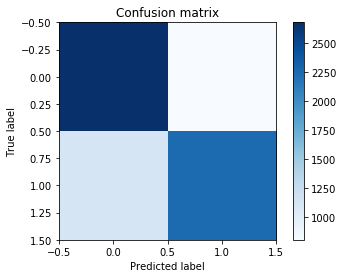

In [36]:
plt.imshow(confusion_matrix(y_test, grid_search.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

SVM

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'gamma': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_trainval, y_trainval)

print("Best cross-validation score: {:.3f}%".format(grid_search.best_score_*100))
print("Test score: {:.3f}%".format(grid_search.score(X_test, y_test)*100))
print("Best parameter: {}".format(grid_search.best_params_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5,5)
sns.heatmap(scores, xticklabels=param_grid['C'],
            yticklabels=param_grid['gamma'], cmap='viridis')
plt.xlabel('C')
plt.ylabel('gamma')

In [ ]:
confusion_matrix(y_test, grid_search.predict(X_test))

In [ ]:
plt.imshow(confusion_matrix(y_test, grid_search.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators=[('forest', RandomForestClassifier(max_depth=10, n_estimators=1000)), 
                ('knn', KNeighborsClassifier(n_neighbors=30)), 
                ('log_reg', LogisticRegression(C=100))],
    voting='hard'
)

voting.fit(X_trainval, y_trainval)

print("Score on trainval of voting classifier set: {:.3f}%".format(voting.score(X_trainval, y_trainval)*100))
print("Score on test set: {:.3f}%".format(voting.score(X_test, y_test)*100))

Score on trainval of voting classifier set: 74.245%
Score on test set: 73.170%


In [42]:
confusion_matrix(y_test, voting.predict(X_test))

array([[2784,  701],
       [1139, 2234]], dtype=int64)

Text(0.5, 0, 'Predicted label')

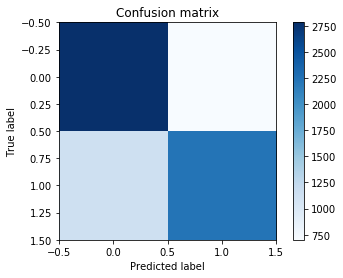

In [40]:
plt.imshow(confusion_matrix(y_test, voting.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators=[('forest', RandomForestClassifier(max_depth=10, n_estimators=1000)), 
                ('knn', KNeighborsClassifier(n_neighbors=2)), 
                ('log_reg', LogisticRegression(C=1000))],
    voting='soft'
)

voting.fit(X_trainval, y_trainval)

print("Score on trainval of voting classifier set: {:.3f}%".format(voting.score(X_trainval, y_trainval)*100))
print("Score on test set: {:.3f}%".format(voting.score(X_test, y_test)*100))

Score on trainval of voting classifier set: 81.344%
Score on test set: 71.056%


In [44]:
confusion_matrix(y_test, voting.predict(X_test))

array([[2632,  853],
       [1132, 2241]], dtype=int64)

Text(0.5, 0, 'Predicted label')

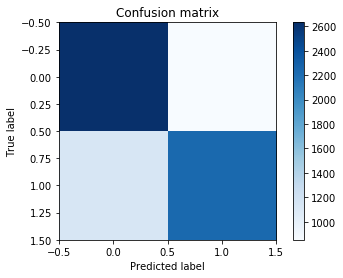

In [45]:
plt.imshow(confusion_matrix(y_test, voting.predict(X_test)), interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')